In [ ]:
import sys
from pathlib import Path
from dotenv import load_dotenv
from utils.analysis import run_analysis, select_good_pairs
from utils.plotting import create_pvalue_heatmap
import matplotlib.pyplot as plt

# Ensure project root is on sys.path for utils imports
try:
  PROJECT_ROOT = Path(__file__).resolve().parents[1]
except NameError:
  PROJECT_ROOT = Path.cwd().resolve().parent
if str(PROJECT_ROOT) not in sys.path:
  sys.path.append(str(PROJECT_ROOT))

#load paths/credentials
load_dotenv()

from utils.cointegration import find_cointegrated_pairs

# Trigger scan and save top 5 pairs
find_cointegrated_pairs()

Top 5 cointegrated pairs:
Pair            P-value      ADF Stat   Hedge Ratio  R²      
V-SAP          0.000040     -4.8703    0.4932       0.9102  
MA-SAP          0.000101     -4.6582    0.4960       0.9044  
V-MA           0.000357     -4.3545    0.9768       0.9710  
AAPL-ANET         0.000871     -4.1277    0.3228       0.8883  
GOOGL-SAP          0.002391     -3.8552    0.5265       0.6505  
Saved top 5 pairs to cointegrated_pairs.pkl


[{'pvalue': np.float64(3.982765594908068e-05),
  'adf_statistic': np.float64(-4.870292784698115),
  'tickers': ('V', 'SAP'),
  'intercept': np.float64(3.0223709663822653),
  'hedge_ratio': np.float64(0.49318084776788407),
  'r_squared': np.float64(0.9101503781430106)},
 {'pvalue': np.float64(0.00010077628258053696),
  'adf_statistic': np.float64(-4.65816046554146),
  'tickers': ('MA', 'SAP'),
  'intercept': np.float64(3.506812541044674),
  'hedge_ratio': np.float64(0.4959623739495811),
  'r_squared': np.float64(0.9044298489479443)},
 {'pvalue': np.float64(0.000356970828700056),
  'adf_statistic': np.float64(-4.354506580128591),
  'tickers': ('V', 'MA'),
  'intercept': np.float64(-0.3595804183178686),
  'hedge_ratio': np.float64(0.9768017802949576),
  'r_squared': np.float64(0.9710379570228973)},
 {'pvalue': np.float64(0.0008713811156952654),
  'adf_statistic': np.float64(-4.127677303102999),
  'tickers': ('AAPL', 'ANET'),
  'intercept': np.float64(3.9115707770017174),
  'hedge_ratio': 

In [ ]:

# Run analysis summary
pair_results = run_analysis()




Summary Statistics:
     Pair  Hedge Ratio  Intercept  Half Life   Spread Mean  Spread Std  Rolling Correlation  Cointegration P-value  ADF Statistic  R Squared
     V-MA     0.976802  -0.359580  25.997657  7.243620e-15    0.031972             0.855501               0.000357      -4.354507   0.971038
AAPL-ANET     0.322769   3.911571  25.166543 -1.055881e-15    0.069786             0.434753               0.000871      -4.127677   0.888267
GOOGL-SAP     0.526489   2.241438  48.609547 -8.543499e-15    0.140239             0.425715               0.002391      -3.855185   0.650531
   MA-SAP     0.495962   3.506813  21.025855  3.313755e-15    0.058591             0.405334               0.000101      -4.658160   0.904430
    V-SAP     0.493181   3.022371  20.714369  1.101946e-14    0.056314             0.387055               0.000040      -4.870293   0.910150


In [10]:

# Automated pair selection based on criteria
print("Automated Pair Selection Results:")
print("=" * 50)

good_pairs, pair_results = select_good_pairs()

print(f"\nFound {len(good_pairs)} good pairs out of {len(pair_results)} total pairs")


Automated Pair Selection Results:

Summary Statistics:
     Pair  Hedge Ratio  Intercept  Half Life   Spread Mean  Spread Std  Rolling Correlation  Cointegration P-value  ADF Statistic  R Squared
     V-MA     0.976802  -0.359580  25.997657  7.243620e-15    0.031972             0.855501               0.000357      -4.354507   0.971038
AAPL-ANET     0.322769   3.911571  25.166543 -1.055881e-15    0.069786             0.434753               0.000871      -4.127677   0.888267
GOOGL-SAP     0.526489   2.241438  48.609547 -8.543499e-15    0.140239             0.425715               0.002391      -3.855185   0.650531
   MA-SAP     0.495962   3.506813  21.025855  3.313755e-15    0.058591             0.405334               0.000101      -4.658160   0.904430
    V-SAP     0.493181   3.022371  20.714369  1.101946e-14    0.056314             0.387055               0.000040      -4.870293   0.910150
✓ V-MA
  P-value: 0.000357, ADF: -4.35
  Half-life: 26.0d, R²: 0.971
  Spread: μ=0.0000, σ=0.032
  

In [11]:
from utils.plotting import create_pvalue_heatmap
import matplotlib.pyplot as plt

pvalue_matrix, tickers = create_pvalue_heatmap()
plt.show()




SANITY CHECKS (Top 5 Pairs)

1. V-MA:
  ✓ Spread mean ≈ 0? True (0.0000)
  ✓ ADF < -2.86? True (-4.35)
  ✓ R² > 0.5? True (0.971)
  ✓ Half-life < 30? True (26.0d)

2. AAPL-ANET:
  ✓ Spread mean ≈ 0? True (-0.0000)
  ✓ ADF < -2.86? True (-4.13)
  ✓ R² > 0.5? True (0.888)
  ✓ Half-life < 30? True (25.2d)

3. MA-SAP:
  ✓ Spread mean ≈ 0? True (0.0000)
  ✓ ADF < -2.86? True (-4.66)
  ✓ R² > 0.5? True (0.904)
  ✓ Half-life < 30? True (21.0d)

4. V-SAP:
  ✓ Spread mean ≈ 0? True (0.0000)
  ✓ ADF < -2.86? True (-4.87)
  ✓ R² > 0.5? True (0.910)
  ✓ Half-life < 30? True (20.7d)



P-value Statistics:
Total pairs tested: 5
Significant pairs (p < 0.05): 10
Highly significant pairs (p < 0.01): 10
Very highly significant pairs (p < 0.001): 8

Min p-value: 0.000040
Max p-value: 0.002391
Median p-value: 0.000357


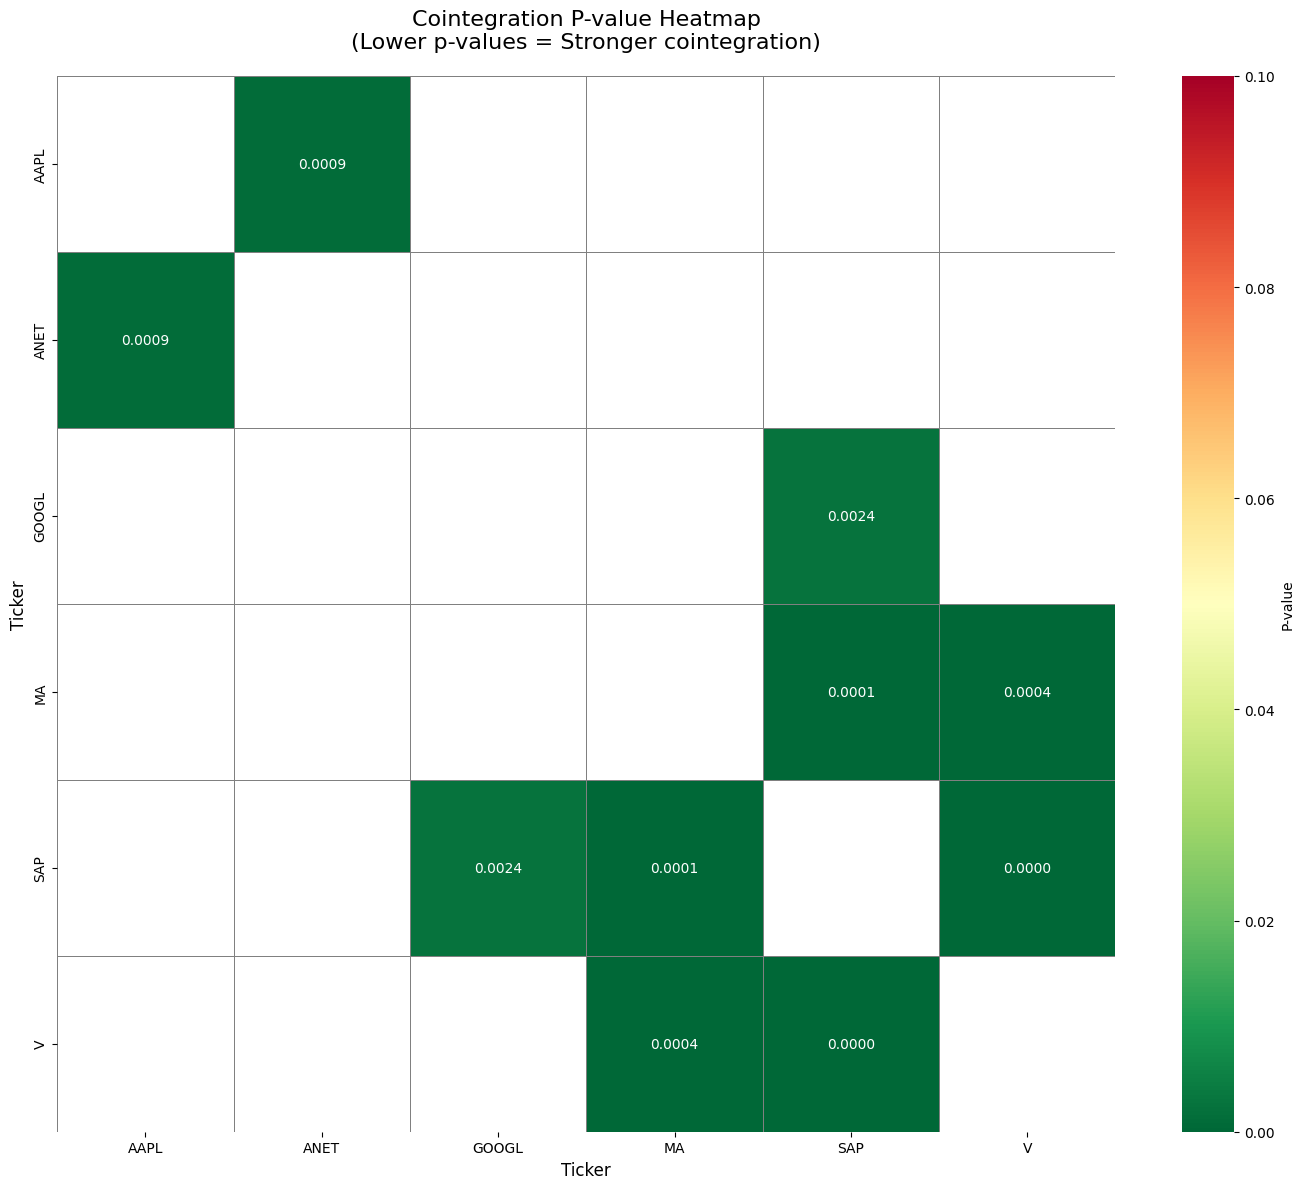

In [ ]:
pvalue_matrix, tickers = create_pvalue_heatmap()
plt.show()